# Analysing Share price data

### importing libraries

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as pt

### reading csv file

In [2]:
datafile = 'FLT.csv'

In [3]:
df = pd.read_csv(datafile)

### changing the format of Date column to datetime

In [4]:
df['Date'] = pd.to_datetime(df['Date']) #df.dtypes - the types of data

In [5]:
# adds day of week column with values , to delete- df.drop(columns=[col name])
df['Day of week'] = df['Date'].dt.day_name() # other way add col - df.loc[0, 'Date'].day_name()

### filtering data, new dataframe

In [6]:
# date_filter = (df['Date'] >= '2010') # date filter
# df.loc[date_filter] # shows filter data

date_filter = (df['Date'] >= pd.to_datetime('2010-01-01')) & (df['Date'] < pd.to_datetime('2020-01-01'))
df2 = df.loc[date_filter]

In [7]:
# setting date as index for df2
df2.set_index('Date', inplace=True)

### resampling and plotting

In [8]:
# resampling one column (Close) with monthly mean
month_mean = df2['Close'].resample('M').mean() # mean of close price for each month of last decade

In [9]:
%matplotlib inline

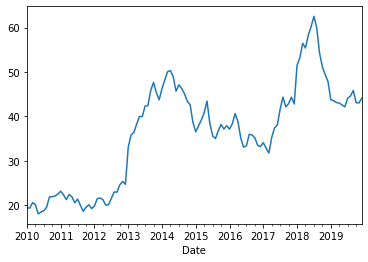

In [10]:
month_mean.plot()

In [11]:
# resampling multiple columns
month_multi = df2.resample('M').agg({'High': 'max', 'Low': 'min', 'Close': 'mean'})

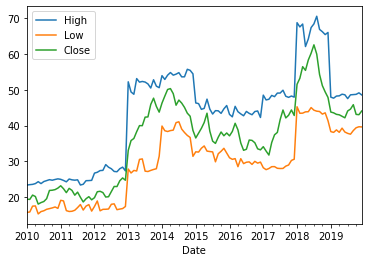

In [12]:
month_multi.plot()

In [13]:
# last financial year
year_filter = (df['Date'] >= pd.to_datetime('2019-07-01')) & (df['Date'] < pd.to_datetime('2020-07-01'))
df3 = df.loc[year_filter]
# df3.set_index('Date', inplace = True)

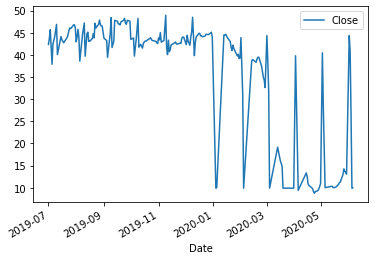

In [14]:
df3.plot(kind='line',x='Date',y='Close')